# British Columbia Snow Survey Data - EDA

The below will work to explore the data as well as clean any anomolies...

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Change directory to midterm project folder (ran by Oliver)
os.chdir('/Users/oscaramirmansour/midterm_project')

In [6]:
# # Change directory to midterm project folder (ran by Christine)
# os.chdir("\\Users\ca0pa\midterm_project")

In [7]:
# Importing the data
snow_survey_df = pd.read_csv('data/allmss_archive.csv')
snow_survey_df
# we have 59028 rows/observations

,Snow Course Name,Number,Elev. metres,Date of Survey,Snow Depth cm,Water Equiv. mm,Survey Code,Snow Line Elev. m,Density %,Survey Period
0,YELLOWHEAD,1A01,1860,1951/03/30,168.0,528.0,NaN,NaN,31.0,01-Apr
1,YELLOWHEAD,1A01,1860,1951/04/30,147.0,485.0,NaN,NaN,33.0,01-May
2,YELLOWHEAD,1A01,1860,1951/05/19,89.0,320.0,NaN,NaN,36.0,15-May
3,YELLOWHEAD,1A01,1860,1952/04/30,157.0,523.0,NaN,NaN,33.0,01-May
4,YELLOWHEAD,1A01,1860,1952/05/19,79.0,264.0,NaN,NaN,33.0,15-May
...,...,...,...,...,...,...,...,...,...,...
59023,STANLEY CREEK,4E03,930,1985/05/16,83.0,307.0,NaN,NaN,37.0,15-May
59024,STANLEY CREEK,4E03,930,1986/03/02,142.0,320.0,NaN,NaN,23.0,01-Mar
59025,STANLEY CREEK,4E03,930,1986/04/01,135.0,365.0,PROBLEM,NaN,27.0,01-Apr
59026,STANLEY CREEK,4E03,930,1986/05/01,121.0,400.0,PROBLEM,NaN,33.0,01-May


In [9]:
snow_survey_df.columns
# columns have leading spaces, so lets fix it

Index(['Snow Course Name', ' Number', ' Elev. metres', ' Date of Survey',
       ' Snow Depth cm', ' Water Equiv. mm', '  Survey Code',
       ' Snow Line Elev. m', ' Density %', ' Survey Period'],
      dtype='object')

In [10]:
# Using str.strip() to remove leading spaces
snow_survey_df.columns = snow_survey_df.columns.str.strip()
snow_survey_df

,Snow Course Name,Number,Elev. metres,Date of Survey,Snow Depth cm,Water Equiv. mm,Survey Code,Snow Line Elev. m,Density %,Survey Period
0,YELLOWHEAD,1A01,1860,1951/03/30,168.0,528.0,NaN,NaN,31.0,01-Apr
1,YELLOWHEAD,1A01,1860,1951/04/30,147.0,485.0,NaN,NaN,33.0,01-May
2,YELLOWHEAD,1A01,1860,1951/05/19,89.0,320.0,NaN,NaN,36.0,15-May
3,YELLOWHEAD,1A01,1860,1952/04/30,157.0,523.0,NaN,NaN,33.0,01-May
4,YELLOWHEAD,1A01,1860,1952/05/19,79.0,264.0,NaN,NaN,33.0,15-May
...,...,...,...,...,...,...,...,...,...,...
59023,STANLEY CREEK,4E03,930,1985/05/16,83.0,307.0,NaN,NaN,37.0,15-May
59024,STANLEY CREEK,4E03,930,1986/03/02,142.0,320.0,NaN,NaN,23.0,01-Mar
59025,STANLEY CREEK,4E03,930,1986/04/01,135.0,365.0,PROBLEM,NaN,27.0,01-Apr
59026,STANLEY CREEK,4E03,930,1986/05/01,121.0,400.0,PROBLEM,NaN,33.0,01-May


In [11]:
# The shape of our dataframe
snow_survey_df.shape

(59028, 10)

In [13]:
# summary statistics for numerical variables
snow_survey_df.describe()

,Elev. metres,Snow Depth cm,Water Equiv. mm,Snow Line Elev. m,Density %
count,59028.000000,58665.000000,58660.000000,3282.000000,54149.000000
mean,1363.544826,119.125594,431.040488,640.841255,33.302092
std,402.608060,94.454581,417.753645,571.114775,9.332047
min,70.000000,0.000000,0.000000,0.000000,0.000000
25%,1100.000000,52.000000,137.000000,0.000000,27.000000
50%,1400.000000,99.000000,302.000000,645.000000,32.000000
75%,1660.000000,166.000000,604.000000,1100.000000,39.000000
max,2230.000000,806.000000,3845.000000,3000.000000,125.000000


In [14]:
# On initial glance, we can see that 'Survey Code' and 'Snow Line Elev. m' contain many NaN values. Lets explore them individually - if Snow Line Elev. m is entirely NaN, may be worth dropping the entire column.
missing_values = snow_survey_df.isnull().sum()
missing_values

Snow Course Name         0
Number                   0
Elev. metres             0
Date of Survey           0
Snow Depth cm          363
Water Equiv. mm        368
Survey Code          56294
Snow Line Elev. m    55746
Density %             4879
Survey Period            6
dtype: int64

In [15]:
# Survey Code has some rows with entries as 'PROBLEM' lets see how many are like this
survey_code_counts = snow_survey_df['Survey Code'].value_counts(dropna=False)
survey_code_counts

Survey Code
NaN                    56294
PROBLEM                 1454
EARLY/LATE               553
N                        360
PRELIMINARY              132
TRACE                    114
EST AREAL AVG             57
EST PILLOW                31
UNSCHEDULED               16
EARLY/LATE/PROBLEMS        9
NOT MEASURED               7
Estimated                  1
Name: count, dtype: int64

In [16]:
# Lets do the same for 'Snow Line Elev. m'
snow_line_Nan = snow_survey_df['Snow Line Elev. m'].isna().sum()
snow_line_Nan

# Majority of Snowline is Nan so it might be worth dropping...

55746

In [24]:
Snow_courses = snow_survey_df['Snow Course Name'].unique()
Snow_courses

array(['YELLOWHEAD', 'MCBRIDE UPPER', 'BARKERVILLE', 'NECHAKO',
       'LONGWORTH UPPER', 'HANSARD', 'FORT ST. JAMES', 'BOWRON LAKE',
       'TORPY RIVER', 'PRINCE GEORGE AIRPORT', 'PACIFIC LAKE',
       'KAZA LAKE', 'LONGWORTH LOWER', 'HEDRICK LAKE', 'KNUDSEN LAKE',
       'BURNS LAKE', 'REVOLUTION CREEK', 'HOLMES RIVER', 'DOME MOUNTAIN',
       'MCBRIDE MIDDLE', 'NARROW LAKE', 'MCBRIDE LOWER', 'BIRD CREEK',
       'FORFAR CREEK (UPPER)', 'MOUNT WELLS', 'TAHTSA LAKE',
       'PONDOSY LAKE', 'WHITESAIL LAKE', 'SKINS LAKE', 'MOUNT SWANNELL',
       'NUTLI LAKE', 'BROOKMERE', 'PORCUPINE RIDGE', 'TRANQUILLE LAKE',
       'PASS LAKE', 'MCGILLIVRAY PASS', 'PAVILION', 'LAC LE JEUNE LOWER',
       'NAZKO', 'HIGHLAND VALLEY', 'FRENCH SNOWSHOE', 'MOUNT PENROSE',
       'GREEN MOUNTAIN', 'BLACK MOUNTAIN', 'HORSEFLY MOUNTAIN',
       'BRALORNE', 'SHALALTH', 'LYTTON', 'MOUNT TIMOTHY',
       'GNAWED MOUNTAIN', 'BOSS MTN. MINE', 'BIG CREEK',
       'PUNTZI MOUNTAIN', 'PENFOLD CREEK', 'YANKS PEAK',


In [26]:
# How many are there in that list..
len(Snow_courses)

359

In [28]:
# Look at possibilites to eliminate Snow Courses with patchy data.
snow_course_counts = snow_survey_df['Snow Course Name'].value_counts()
snow_course_counts

Snow Course Name
GLACIER                501
FARRON                 474
HUDSON BAY MOUNTAIN    473
SULLIVAN MINE          461
GRAY CREEK LOWER       444
                      ... 
BLACKWATER LOOKOUT       3
MISSINKA RIVER           2
BIGMOUTH CREEK           2
MIDDLE RIVER             1
WHITESAIL LAKE           1
Name: count, Length: 359, dtype: int64

## The number of survey stations is large, resulting in many possible correlational sets, so we'll investigate whether some stations can be removed - as survey dates go back to 1935.

In [29]:
# Visualizing distribution of data points for each year by 'date of survey'
snow_survey_df['Date of Survey'] = pd.to_datetime(snow_survey_df['Date of Survey'])

In [30]:
snow_survey_df['Year'] = snow_survey_df['Date of Survey'].dt.year

In [31]:
year_counts = snow_survey_df['Year'].value_counts().sort_index()
year_counts

Year
1935      6
1936      6
1937     10
1938     31
1939     26
       ... 
2019    677
2020    675
2021    663
2022    619
2023    530
Name: count, Length: 89, dtype: int64

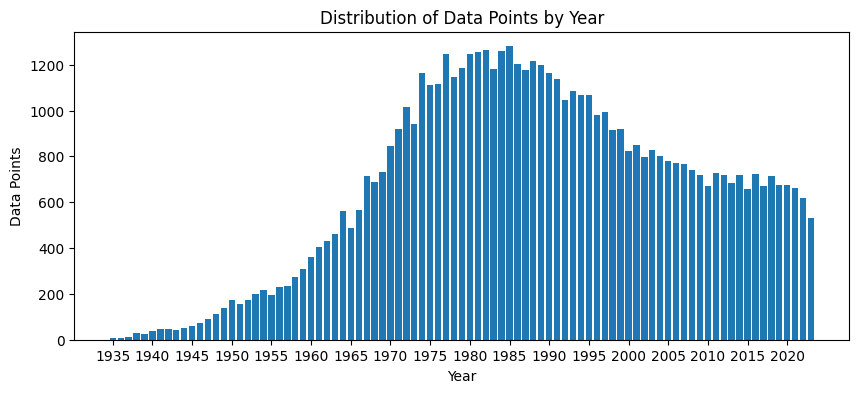

<Figure size 640x480 with 0 Axes>

In [40]:
# Now we'll create a plot to visualize the distribution of the counts by years.
plt.figure(figsize=(10,4))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Data Points')
plt.title('Distribution of Data Points by Year')
plt.xticks(year_counts.index[::5])
plt.show()

# Saving image to output folder

# filepath for output folder
output_folder = '/Users/oscaramirmansour/midterm_project/output/'

filename = 'DistributionDataPointsYear.png'

output_path = output_folder + filename

plt.savefig(output_path)

## Now, let's look at the distribution of data points for each snow course name to eliminate any that might only be represented by a few data points.

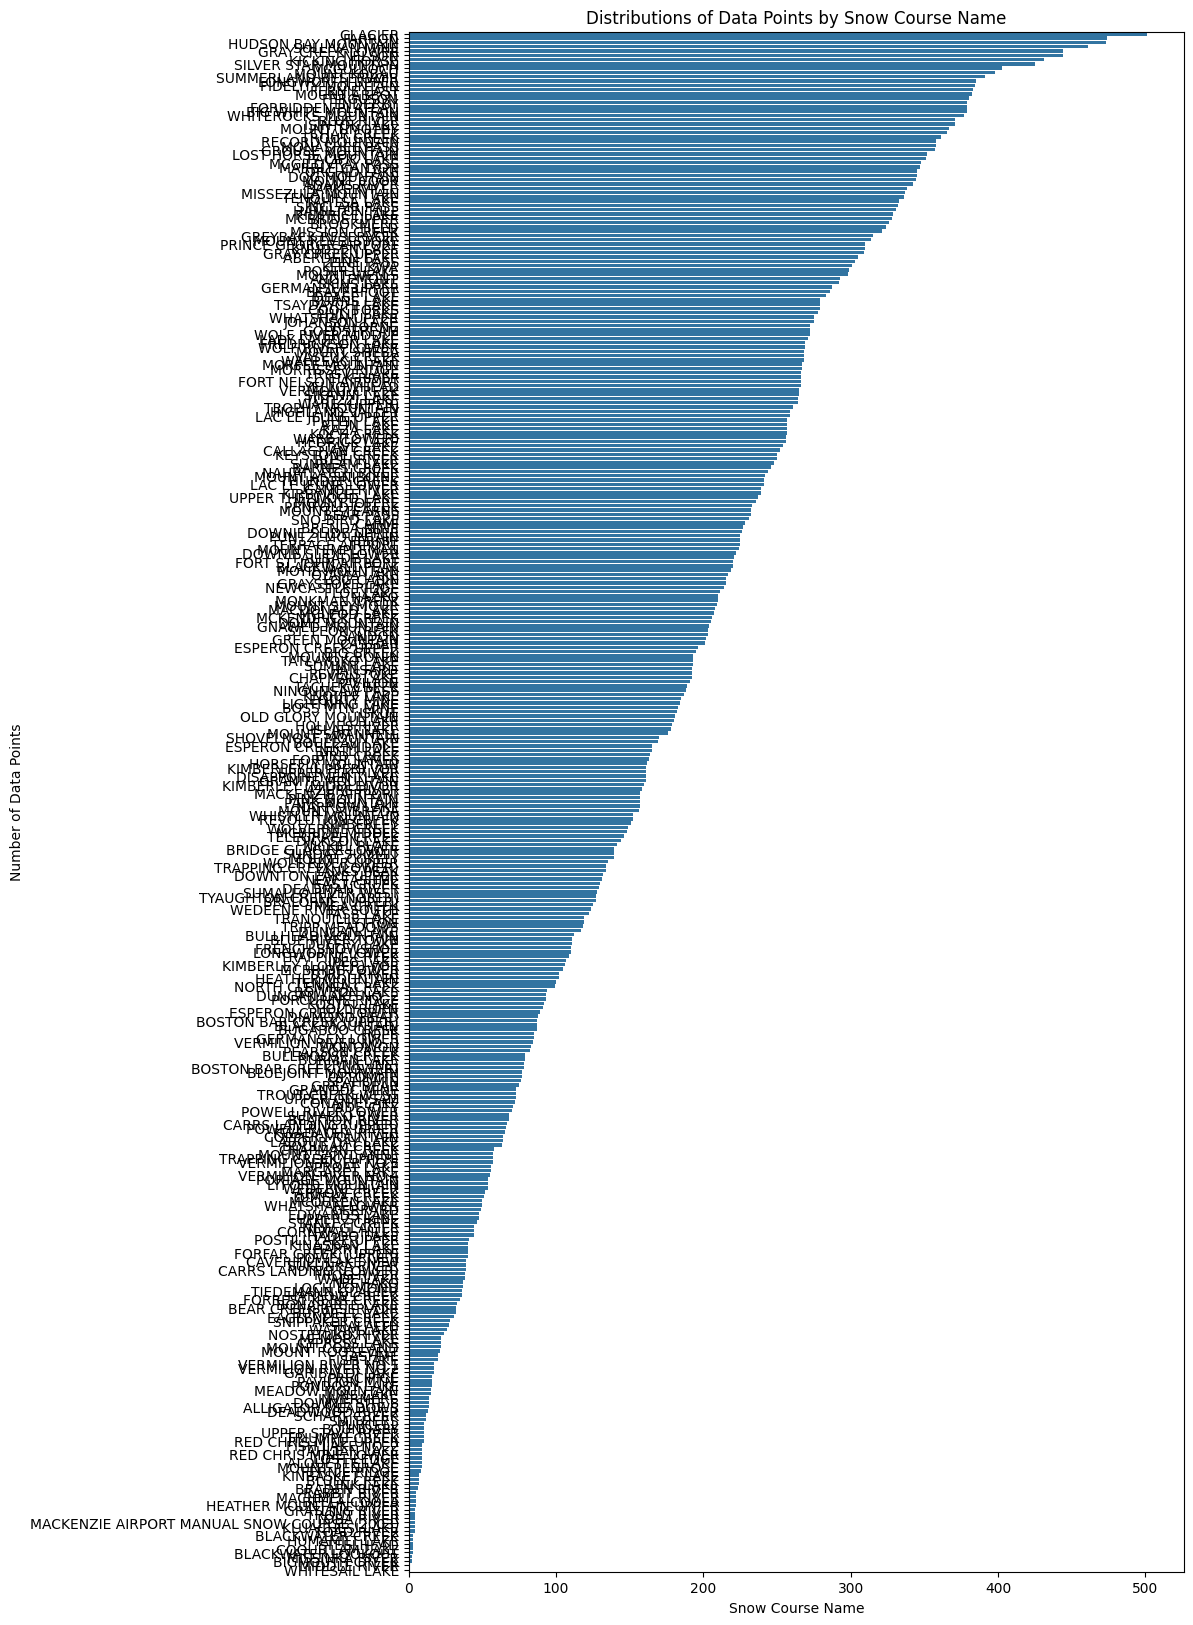

<Figure size 640x480 with 0 Axes>

In [41]:
plt.figure(figsize=(10,20))
ax = sns.barplot(y=snow_course_counts.index, x=snow_course_counts.values)
plt.xlabel('Snow Course Name')
plt.ylabel('Number of Data Points')
plt.title('Distributions of Data Points by Snow Course Name')
plt.show()

# 359 stations/snow courses so this isnt the best way to visiualise them...

# Saving image to output folder - filepath for output folder:
output_folder = '/Users/oscaramirmansour/midterm_project/output/'

filename = 'DistributionDataPointsSnowCourse.png'

output_path = output_folder + filename

plt.savefig(output_path)

In [42]:
# Printing dataset again so we dont have to scroll up..
snow_survey_df.head()

,Snow Course Name,Number,Elev. metres,Date of Survey,Snow Depth cm,Water Equiv. mm,Survey Code,Snow Line Elev. m,Density %,Survey Period,Year
0,YELLOWHEAD,1A01,1860,1951-03-30,168.0,528.0,NaN,NaN,31.0,01-Apr,1951
1,YELLOWHEAD,1A01,1860,1951-04-30,147.0,485.0,NaN,NaN,33.0,01-May,1951
2,YELLOWHEAD,1A01,1860,1951-05-19,89.0,320.0,NaN,NaN,36.0,15-May,1951
3,YELLOWHEAD,1A01,1860,1952-04-30,157.0,523.0,NaN,NaN,33.0,01-May,1952
4,YELLOWHEAD,1A01,1860,1952-05-19,79.0,264.0,NaN,NaN,33.0,15-May,1952


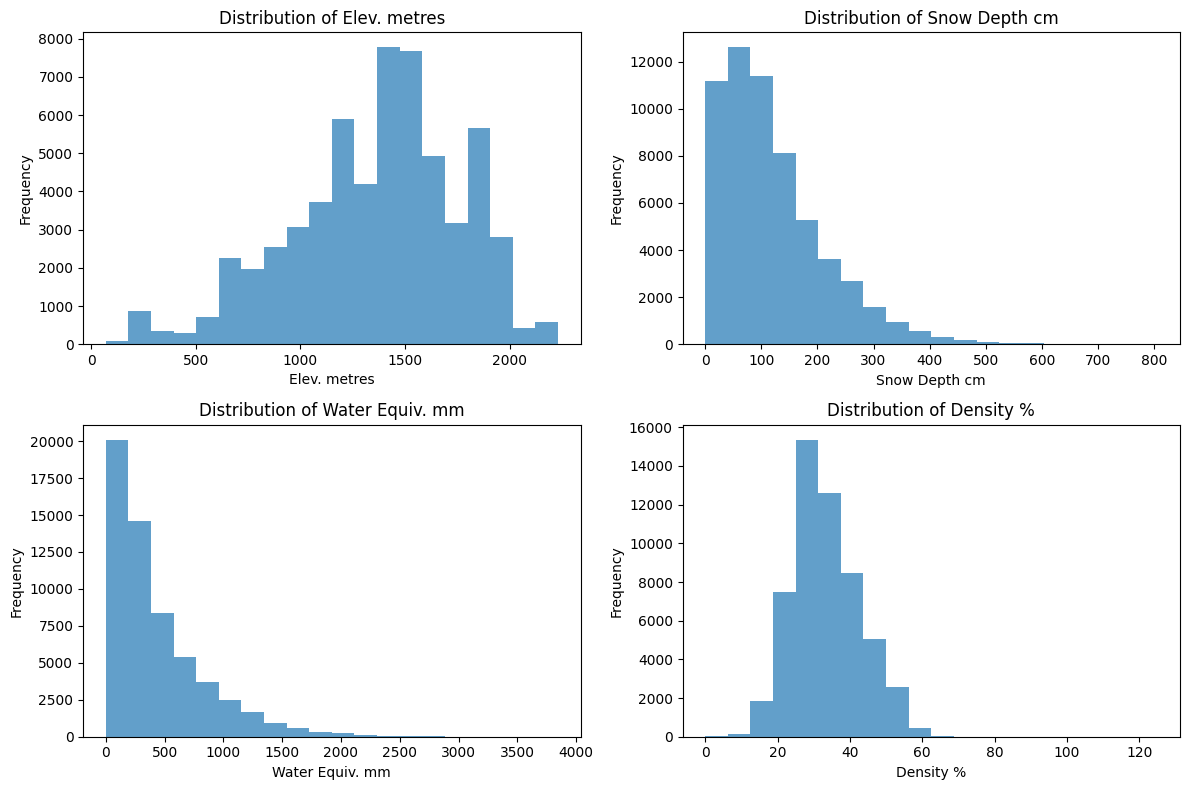

<Figure size 640x480 with 0 Axes>

In [52]:
# Let's create histograms for the 'Elev. metres', 'Snow Depth cm', 'Water Equiv. mm' and 'Density'. Given the overwhelming presence of NaN values in 'Survey Code' and 'Snow Line Elev. m' we wont be using those columns and they will be dropped in cleaning, just before modelling.

# Variables we want to plot
variables = ['Elev. metres', 'Snow Depth cm', 'Water Equiv. mm', 'Density %']

# creating the plots and sizes we want
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# because axes is a 2D array, flatten converts it into a 1D array which makes it easier to iterate through.
axes = axes.flatten()

# enumerating through all our variables and creating histograms for each.
for i, variable in enumerate(variables):
    axes[i].hist(snow_survey_df[variable], bins = 20, alpha = 0.7)
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {variable}')

# fit plots, ensuring no overlapping..
plt.tight_layout()

plt.show()


# Saving image to output folder - filepath for output folder:
output_folder = '/Users/oscaramirmansour/midterm_project/output/'

filename = 'Histograms.png'

output_path = output_folder + filename

plt.savefig(output_path)


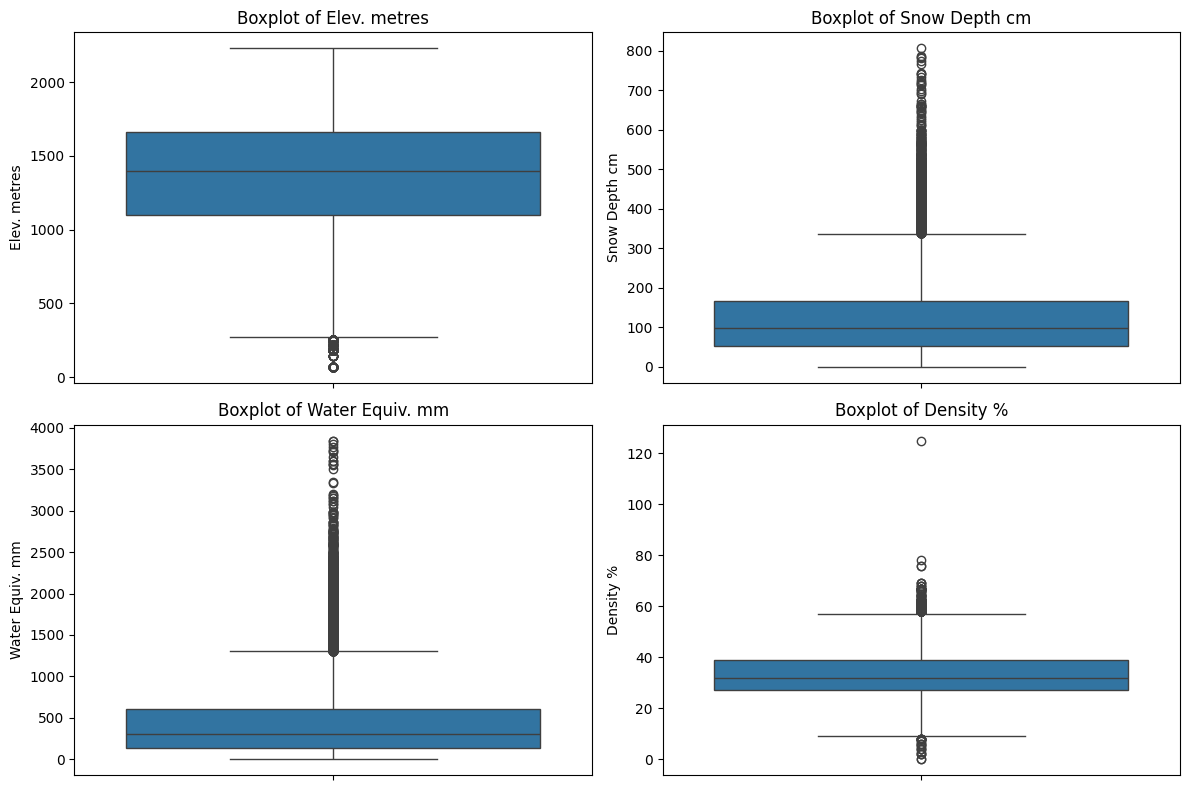

<Figure size 640x480 with 0 Axes>

In [54]:
# Let's create boxplots for the 'Elev. metres', 'Snow Depth cm', 'Water Equiv. mm' and 'Density'. Given the overwhelming presence of NaN values in 'Survey Code' and 'Snow Line Elev. m' we wont be using those columns and they will be dropped in cleaning, just before modelling.

# Variables we want to plot
variables = ['Elev. metres', 'Snow Depth cm', 'Water Equiv. mm', 'Density %']

# creating the plots and sizes we want
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# because axes is a 2D array, flatten converts it into a 1D array which makes it easier to iterate through.
axes = axes.flatten()

# enumerating through all our variables and creating histograms for each.
for i, variable in enumerate(variables):
    sns.boxplot(data = snow_survey_df, y = variable, ax = axes[i])
    axes[i].set_ylabel(variable)
    axes[i].set_title(f'Boxplot of {variable}')

# fit plots, ensuring no overlapping..
plt.tight_layout()

plt.show()


# Saving image to output folder - filepath for output folder:
output_folder = '/Users/oscaramirmansour/midterm_project/output/'

filename = 'Boxplots.png'

output_path = output_folder + filename

plt.savefig(output_path)